<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v2.0

### **Objetivos**
*   Estudiar el dataset de mnist que contiene 70.000 imagenes de números escritos a mano.
* Visualizar las imágenes a analizar.
* Normalizar la imágenes.
* Comparar tres redes neuronales.
* Transformar la salida a categorical.
* Construir, entrenar y evaluar al modelo con una Red Neuronal.
* Validar el modelo con una imagen externa.

In [3]:
#Librerias a implementar
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

import matplotlib.image as mpimg

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

### `MNIST dataset`
Contiene 70.000 imagenes de números escritos a mano (números del 0 al 9, 10 dígitos). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el dígito que representa la imagen en cuestión, un número de 0 al 9


## Código de carga del dataset mnist

In [4]:
# Importar mnist de keras.datasets
from keras.datasets import mnist

# Leer el dataset de mnist.
# Viene con los datos separados para entrenar y evaluar.
# De objeto importado  "mnist" utilizar el método load_data()
(data_X_train, data_y_train), (data_X_test, data_y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


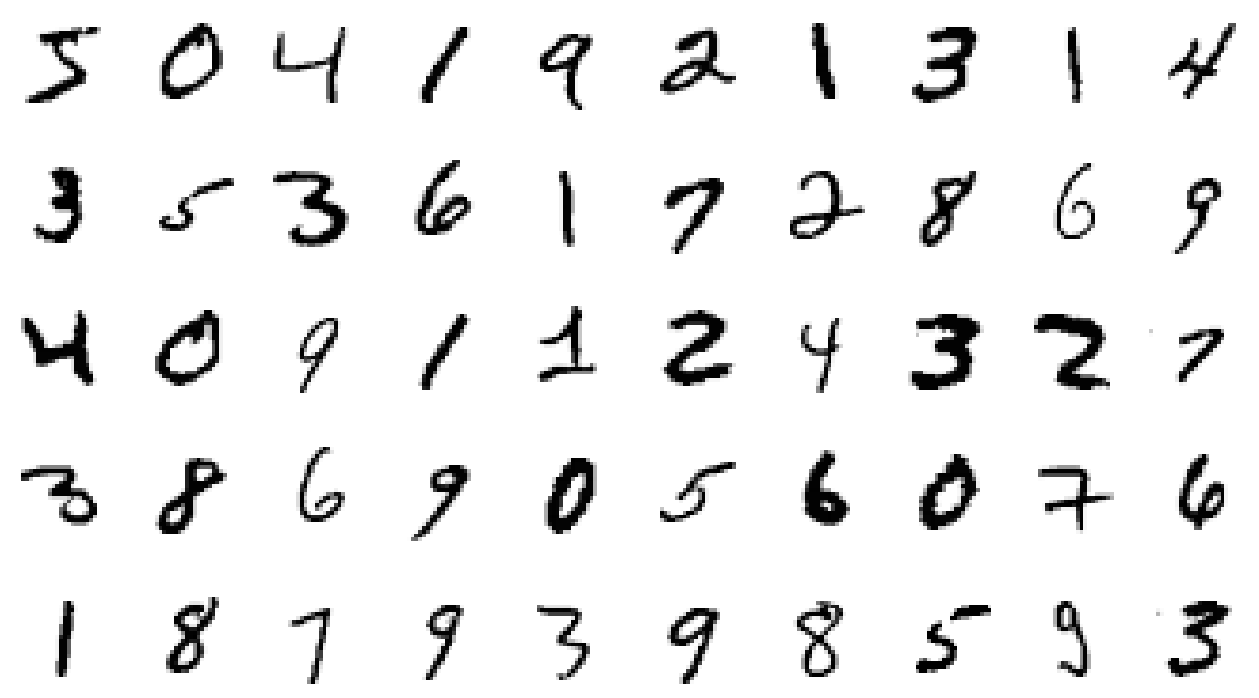

In [5]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

# Bucle que itera 50 veces para mostrar las primeras 50 imágenes del dataset
for i in range(50):

    # ax gráfico que mostrará las imágenes en 5 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(5, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Muestra las 50 imágenes de la variable data_X_train en el espacio del dibujo
    plt.imshow(data_X_train[i], cmap='Greys')

# Muestra la figura
plt.show()

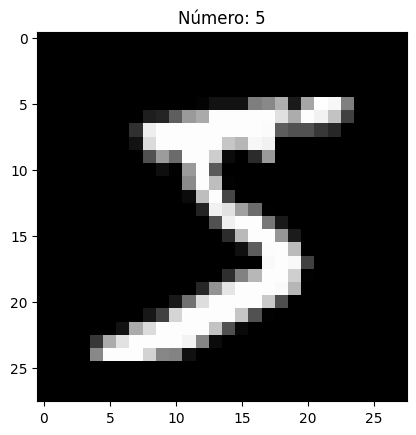

In [6]:
# plt, alias de Matplotlib
# Muestra la primer imagen (data_X_train[0] )de la variable data_X_train en el espacio del dibujo.
# cmap='gray', escala de grises
plt.imshow(data_X_train[0], cmap='gray')

# Agrega título concatenando el número a mostrar de la primer posición
plt.title("Número: " + str(data_y_train[0]))

# Muestra la imagen
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Observar como está representada la imagen, ver fila del medio (14)
# data_X_train[0] información de la primer imagen
# [14, :] muestra la fila 14 y todas las columnas (:)
print(data_X_train[0][14, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]


In [8]:
# Por los resultados podemos ver que la imagen está representada de 0 a 255
# Normalizamos los datos para que se encuentren entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [9]:
# shape[0], devuelve cantidad de datos en observacion de la primer imagen.
print('Cantidad de datos en observacion:', X_train_norm.shape[0])

Cantidad de datos en observacion: 60000


In [10]:
# Muetra las dimensiones de la primer imagen normalizada.
print('Tamaño de la imagen:', X_train_norm[0].shape)

Tamaño de la imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [11]:
# Observar el los primeros 10 datos del dataset de y_train
print(data_y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


## Exploramos los primeros diez 8 del dataset para train

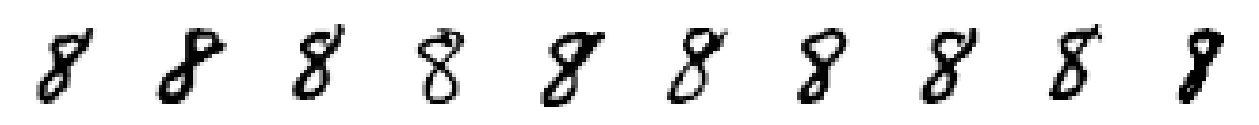

In [12]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a 8
    while True:
        if data_y_train[j] == 8:

            # Muestra la imagen con escala de grises
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

## Exploramos los primeros diez 8 del dataset para test

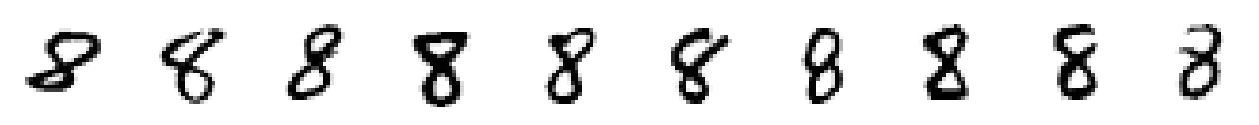

In [13]:
# plt alias de Matplotlib.
# Método figure() crea el espacio para dibujar.
# Con figsize=(16,9) se define el ancho y alto del dibujo
fig = plt.figure(figsize=(16,9))

#contador
j = 0

# Itera 10 veces
for i in range(10):

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, i+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Bucle que verifica que la imagen sea igual a 8
    while True:
        if data_y_test[j] == 8:

            # Muestra la imagen en escala de grises
            ax.imshow(X_test_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [14]:
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
# shape devuelve filas y columnas
# Multiplica las filas por columnas (X_train_norm.shape[1] * X_train_norm.shape[2])
num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

# X_train_norm.reshape(X_train_norm.shape[0], num_pixels) Ajusta el array a dos dimensiones
# Tipo de dato (astype('float32'))
X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

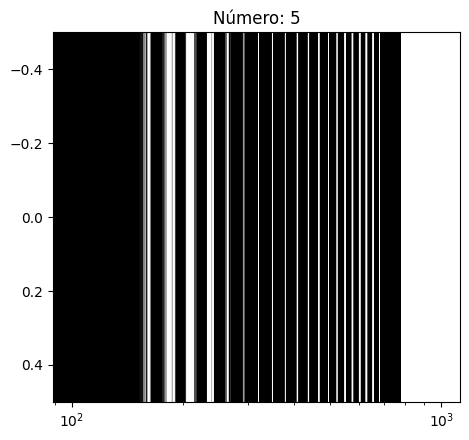

In [15]:
# ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()

# Muestra la primer imagen de X_train con un ajuste .reshape(-1,1) y con escala de grises
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')

# Escala de números en el eje de las x como potencia de base 10
ax.set_xscale("log")

# Agrega titulo
plt.title("Número: " + str(data_y_train[0]))

# Muetra la imagen
plt.show()

In [16]:
# Devuelve información de la imagen.
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [17]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [18]:
# Transformar la salida a oneHotEncoding con to_categorical
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)

# Muestra los 10 primeros to_categorical
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# input shape (almacena la cantidad de pixeles de las imagen)
in_shape = X_train.shape[1]
in_shape

784

In [20]:
# output shape, almacena la cantidad de número identificados en el dataset.
out_shape = y_train.shape[1]
out_shape

10

In [21]:
# Se importa Dense de la librería tensorflow.keras.layers
from keras.layers import Dense, Dropout

# Se crea el objeto model a partir de la clase Sequential()
model = Sequential()

# Se crea la capa de entrada y las capas ocultas de la red, que tendrá:
# --> tantas entradas (input_shape) como columnas (in_shape), se especifica en la primera capa
# --> tantas neuronas como deseemos (units)
# --> utilizamos "relu" como capa de activación
model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))

# Se agregan dos capas más con las mismas neuronas y función de activación units=64, activation='relu'
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Se crea la capa de salida, que tendrá tantas neuronas como salidas posibles
# Se implementa 'softmax' ya que la salida es multiple
model.add(Dense(units=out_shape, activation='softmax'))

# Configuración del modelo para el entrenamiento, implementando el método compile a partir del modelo creado.
# Se necesita indicar los parámetros:
# optimizer, nombre del optimizador (es el algoritmo que se encarga del descenso de gradiente estocástico)
# Fuente: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
# loss, se llama función de pérdida, representa las categorías conocidas de las predicción. Al ser 'categorical_crossentropy'
#la predicción tiene una salida con varias opciones.
# metrics, se define la métrica que evaluará el modelo durante el entrenamiento y las pruebas.
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen de la estructura de la red profunda.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Se entrena el modelo con el método fit
# Necesita definir los valores para X_train, y_train sumado a la cantidad de épocas que seria la iteraciones de entrenamiento.
# dirigido a validación (validation_split=0.2)
# batch_size, tamaño del lote a entrenar.
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)


Epoch 1/10
375/375 [==============================] - 4s 4ms/step - loss: 0.4384 - accuracy: 0.8740 - val_loss: 0.1911 - val_accuracy: 0.9482
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1693 - accuracy: 0.9505 - val_loss: 0.1453 - val_accuracy: 0.9573
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1211 - accuracy: 0.9644 - val_loss: 0.1387 - val_accuracy: 0.9596
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.1102 - val_accuracy: 0.9677
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9759 - val_loss: 0.1079 - val_accuracy: 0.9682
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0996 - val_accuracy: 0.9705
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.1009 - val_accuracy: 0.9713
Epoch 

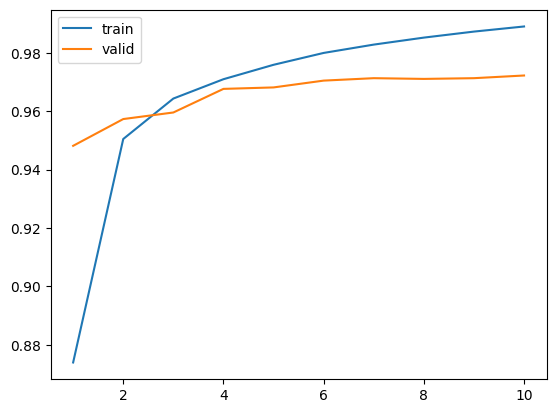

In [23]:
# Variable epoch_count, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella, se puede acceder a información como su historial (history) del accuracy
epoch_count = range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

Se puede observar que el modelo con más capas ocultas tienen menos parámetros para entrar porque la capa expuesta a la entrada tiene menos neuronas.
Pero, al aumentar la complejidad de la red con más capas profundas el sistema produce overfitting, deja de aprender

In [24]:
# Para arreglar esto se utiliza regularizacion, que es el proceso por el cual
# el sistema tiene la capacidad de "apagar" neuronas de las capas y buscar
# el modelo que mejor funcione.

# Se crea el objeto model a partir de la clase Sequential()
model = Sequential()

# Se seleccionó que se apagen el 20% de la neurona de la capa
# A este número se lo obtuvo realizando diferentes pruebas, en general se
# ensaya con --> 0.2, 0.5 y 0.8
dropout_rate = 0.2

# Red neuronal que tiene 4 capas densas y dos de dropout
model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 5921

In [25]:
# Se entrena el modelo con el método fit
# Necesita definir los valores para X_train, y_train sumado a la cantidad de épocas que seria la iteraciones de entrenamiento.
# dirigido a validación (validation_split=0.2)
# batch_size, tamaño del lote a entrenar.
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)


Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.5673 - accuracy: 0.8249 - val_loss: 0.1977 - val_accuracy: 0.9411
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2411 - accuracy: 0.9293 - val_loss: 0.1506 - val_accuracy: 0.9554
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1768 - accuracy: 0.9487 - val_loss: 0.1296 - val_accuracy: 0.9620
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1455 - accuracy: 0.9568 - val_loss: 0.1179 - val_accuracy: 0.9638
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1216 - accuracy: 0.9637 - val_loss: 0.1099 - val_accuracy: 0.9664
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1042 - accuracy: 0.9694 - val_loss: 0.1049 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9723 - val_loss: 0.1066 - val_accuracy: 0.9685
Epoch 

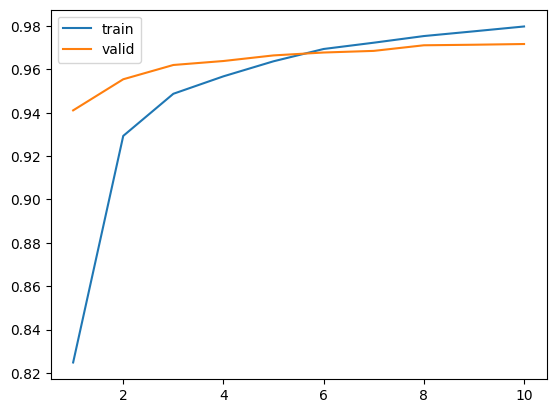

In [26]:
# Variable epoch_count, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella, se puede acceder a información como su historial (history) del accuracy
epoch_count = range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [27]:
# Al apagar neuronas de las capas se puede seguir aumentando la complejidad
# para ensayar
model = Sequential()

# Se seleccionó que se apagen el 20% de la neurona de la capa
# A este número se lo obtuvo realizando diferentes pruebas, en general se
# ensaya con --> 0.2, 0.5 y 0.8
dropout_rate = 0.2

# Red neuronal que tiene 7 capas densas y 5 de dropout
model.add(Dense(units=64, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [28]:
# Se entrena el modelo con el método fit
# Necesita definir los valores para X_train, y_train sumado a la cantidad de épocas que seria la iteraciones de entrenamiento.
# dirigido a validación (validation_split=0.2)
# batch_size, tamaño del lote a entrenar.
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)


Epoch 1/10
375/375 [==============================] - 5s 6ms/step - loss: 0.8396 - accuracy: 0.7176 - val_loss: 0.2366 - val_accuracy: 0.9336
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3032 - accuracy: 0.9215 - val_loss: 0.1963 - val_accuracy: 0.9493
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2233 - accuracy: 0.9435 - val_loss: 0.1571 - val_accuracy: 0.9581
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1863 - accuracy: 0.9533 - val_loss: 0.1509 - val_accuracy: 0.9607
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1562 - accuracy: 0.9601 - val_loss: 0.1370 - val_accuracy: 0.9648
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1397 - accuracy: 0.9650 - val_loss: 0.1398 - val_accuracy: 0.9641
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1251 - accuracy: 0.9672 - val_loss: 0.1443 - val_accuracy: 0.9643
Epoch 

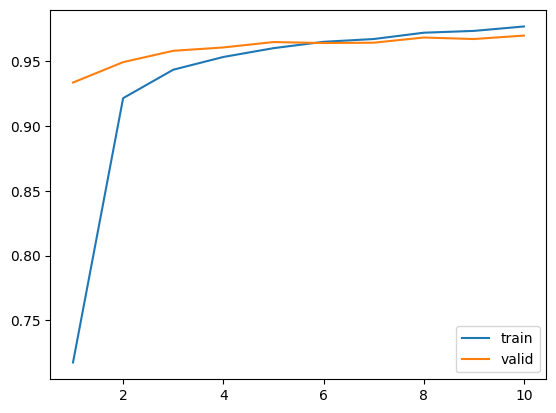

In [29]:
# Variable epoch_count, que almacena en una lista la cantidad de épocas de train
# history, es la variable que almacena las predicciones del modelo
# y de ella, se puede acceder a información como su historial (history) del accuracy
epoch_count = range(1, len(history.history['accuracy']) + 1)

# De Seaborn (sns) se accede al gráfico de línea para representar;
# Por un lado, el 'accuracy',
# Por el otro, la validación (val_accuracy)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [30]:
# Variable y_hat_prob que almacena las probabilidades de las predicciones
# con los datos de evaluación
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

313/313 [==============================] - 1s 2ms/step


array([[4.8015113e-13, 6.9460202e-09, 1.1778912e-06, 5.7807515e-06,
        5.9204428e-09, 5.3941851e-12, 2.3302078e-14, 9.9999249e-01,
        3.1465416e-10, 5.4366200e-07],
       [2.1869800e-08, 5.3588915e-06, 9.9998629e-01, 1.8594250e-06,
        4.5262433e-07, 3.1622115e-11, 1.6086396e-08, 5.7936413e-06,
        7.7320735e-08, 1.0592895e-10],
       [9.6715980e-10, 9.9998403e-01, 2.2074789e-06, 1.9359834e-07,
        7.6301598e-07, 1.2073708e-08, 2.5604382e-07, 6.3023190e-06,
        5.7890829e-06, 4.0639230e-07]], dtype=float32)

In [31]:
# Muestra las clasificación de cada imagen, de acuerdo a la probabilidad más alta.
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:3]

array([7, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [32]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.1130 - accuracy: 0.9721


0.972100019454956

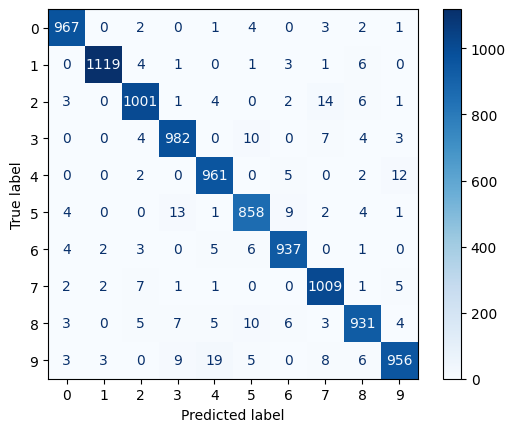

In [33]:
# Se utiliza la matriz de confusión para evaluar la precisión de una clasificación.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Necesita dos variables que contengan los valores a comparar
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Código para realizar la representación gráfica con los resultados
# Se crea la varible cmd, que almacena visualization de la Confusion Matrix
# Necesita la variable cm que contiene los resultados de la comparación entre los valores reales y predicción
# display_labels, se especifica las etiquetas de las categorias que se evalúan.
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))

# Con cmd.plot se especifica el mapa de colores reconocido por matplotlib.
cmd.plot(cmap=plt.cm.Blues)

# Mostrar la figura
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 números clasificados con una ANN para evaluar contra este nuevo modelo de red neuronal

In [34]:
# Ubicación de los peores ochos por indice
ranking_10 = [8183, 6765, 8522, 1325, 582, 9280, 5749, 3567, 3206, 9744]

In [35]:
# Obtener los vectores para evaluar
# Ubica el vector de cada imagen por su ubicación
X_test_peores = X_test[ranking_10]

# Ubica el número que corresponde a cada imagen por su ubicación
y_test_peores = y_test[ranking_10]

In [36]:
# Calcular la exactitud
score = model.evaluate(X_test_peores, y_test_peores)
score[1]

1/1 [==============================] - 0s 30ms/step - loss: 4.0224 - accuracy: 0.4000


0.4000000059604645

In [37]:
# ¿Qué es lo que el sistema ve?

# Predicción
y_hat_prob_peores = model.predict(X_test_peores)

# Ubica de acuerdo a la probabilidad más alta cuál es el número que le corresponde.
y_hat_peores = np.argmax(y_hat_prob_peores,axis=1)
y_hat_peores

1/1 [==============================] - 0s 24ms/step


array([5, 5, 6, 8, 2, 5, 8, 5, 8, 8])

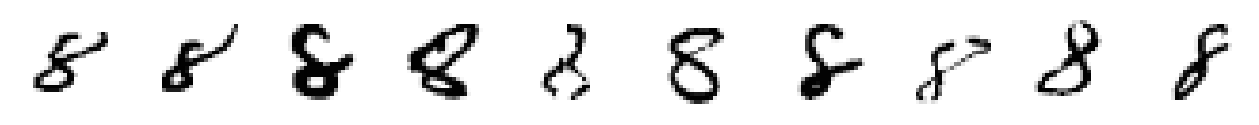

In [38]:
# Espacio para dibujar
fig = plt.figure(figsize=(16,9))

# Contador
j = 0

for i in ranking_10:

    # ax, gráfico que mostrará las imágenes en 1 filas y 10 columnas
    # En cada iteración va ubicando la imagen en la siguiente posición (i+1)
    ax = fig.add_subplot(1, 10, j+1)

    # .axis('off') elimina el recuadro de cada imagen
    ax.axis('off')

    # Muestra la imagen en escala de grises
    ax.imshow(X_test_norm[i], cmap='Greys')
    j += 1

plt.show()

array([8, 8, 8, 8, 2, 8, 6, 5, 3, 8])

### Prueba con imagen externa (Dibujar un número en paint con fondo negro y número en blanco)

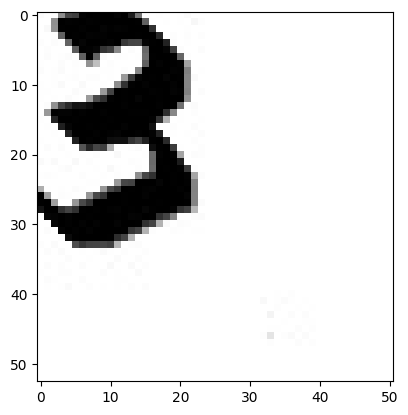

In [197]:
# Leer la imagen
img1 = mpimg.imread('tres.jpg')

# Mostrar la imagen
plt.imshow(img1)
plt.show()

In [198]:
# Ver las dimensiones de la imagen cargada
img1.shape

(53, 51, 3)

In [199]:
# Función que extrae los canales de color
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [200]:
# Se invoca la función y se le pasa la imagen
gray = rgb2gray(img1)
gray.shape

(53, 51)

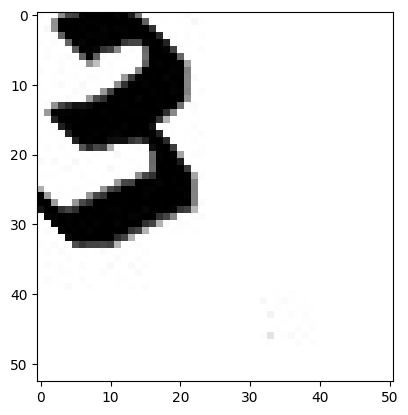

In [201]:
# cmap='gray', variación de colores en grises, indicando los valores máximo y mínimo de la escala de colores.
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [202]:
#Modificando las dimensiones de la imagen para que sea 28x28
copi_img = gray[:28,:28]
copi_img.shape

(28, 28)

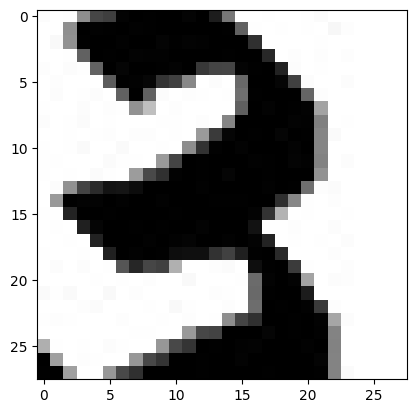

In [203]:
plt.imshow(copi_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [204]:
# Preprocesar la imagen
# Normalizar
img_norm = copi_img / 255.0

# Calcular el número de pixeles de la imagen.
num_pixel = img_norm.shape[0] * img_norm.shape[1]
num_pixel

784

In [205]:
# Ajustar la imagen en una fila.
img_prueba = img_norm.reshape(1,num_pixel).astype('float32')
img_prueba.shape

(1, 784)

In [206]:
# ¿Qué es lo que el sistema ve?
# Predicción
prediccion = model.predict([img_prueba])
prediccion[0]

1/1 [==============================] - 0s 17ms/step


array([2.5563244e-08, 2.3640537e-06, 4.4565753e-04, 9.9687946e-01,
       1.0454415e-09, 6.3043542e-04, 2.7319986e-09, 2.0322602e-03,
       2.7341559e-06, 7.1709214e-06], dtype=float32)

In [207]:
# Muestra las clasificación de cada imagen, de acuerdo a la probabilidad más alta.
y_prediccion = np.argmax(prediccion,axis=1)
y_prediccion[0]

3

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning, redes profundas, logramos obtener un mejor resultado. __PERO!__ Al utilizar más capas fue necesario el proceso de regularización con dropout para poder evitar que un modelo más complejo produza overfiting. <br>
Este modelo sigue siendo incapaz de manejar imagenes a color debido a la necesidad del proceso de flatten.